## Digit Recognition with Convolutional Neural Networks
Submitted By:
- Pratyaksh Chauhan (055031)
- Himanshu Badgamia (0550113)

**Group No.: 22**
---
## Problem Statement:

Recognizing handwritten digits accurately is essential in many industries, such as postal services, banking, and automated data entry. However, traditional recognition methods often struggle with variations in handwriting styles, leading to errors. This project focuses on building a powerful Deep Convolutional Neural Network (CNN) to classify handwritten digits efficiently. By using deep learning, the model improves accuracy, minimizes manual intervention, and enhances real-world applications of automated handwriting recognition.

## Abstract:

This project explores the development of a Deep Convolutional Neural Network (CNN) using TensorFlow and Keras for classifying handwritten digits. The model is trained on a labeled dataset, where convolutional layers help extract spatial features, and fully connected layers handle classification. Deep learning techniques enable the model to adapt to different handwriting styles, ensuring high recognition accuracy. The final trained model is suitable for applications such as digital form processing and automated document digitization.

## Project Structure:

1. Importing Libraries
2. Data Preprocessing
3. Model Architecture
4. Training the Model
5. Evaluating Performance
6. Making Predictions

## Data Preprocessing:

### 1. Importing the Libraries:
  - TensorFlow and Keras for deep learning model development.
  - Pandas and NumPy for data handling.
  - Matplotlib and Seaborn for data visualization.
  - Scikit-learn for dataset splitting and performance evaluation.

### 2. Preparing the Dataset:
We use the MNIST dataset, which consists of labeled handwritten digits. The dataset is loaded into a Pandas DataFrame, and preprocessing steps are applied to clean and prepare it for training.

#### 2.1. Normalization:
Since pixel values range from 0 to 255, we scale them to a 0-1 range to improve training stability and speed.

#### 2.2. Reshaping:
Each image is reshaped into a 28x28x1 matrix, matching the expected input format for the CNN model.

#### 2.3. Encoding:
The labels are converted into a one-hot encoded format, making them compatible with the classification process.

#### 2.4. Train-Test Split:
To evaluate model performance properly, the dataset is split into training and validation sets, ensuring a balanced assessment of its accuracy and generalization capability.

## Model Architecture:

The CNN model follows a structured approach with the following components:

- **Convolutional Layers:** Extract key features from the images.
- **ReLU Activation:** Introduce non-linearity to improve learning.
- **MaxPooling:** Reduce dimensionality while retaining important features.
- **Dropout:** Prevent overfitting by randomly dropping connections during training.
- **Fully Connected Layers:** Classify the extracted features into digit categories.

### Data Augmentation:
Since deep learning models perform better with diverse datasets, we use augmentation techniques like rotation, zooming, and flipping to enhance the model’s adaptability to different handwriting styles.

### Optimization Strategy:
- **RMSProp optimizer** ensures faster and stable convergence.
- **ReduceLROnPlateau** dynamically adjusts the learning rate to improve accuracy and prevent stagnation.

## Training the Model:

The dataset is fed into the CNN, and the model is trained using GPU acceleration for efficiency. We monitor training and validation losses throughout to ensure the model is learning effectively.

## Evaluating Performance:

- **Learning Curves:** Visualize training and validation loss trends.
- **Confusion Matrix:** Identify correct and incorrect classifications.
- **Accuracy Metrics:** Assess overall performance and areas for improvement.

## Making Predictions:

- The trained model is tested on new handwritten digits to validate its real-world applicability.
- Predictions are saved and structured for further analysis.

## Managerial Insights:

- **Automation Readiness:** The model’s high accuracy makes it a strong candidate for replacing manual digit recognition processes.
- **Cost Savings:** By reducing human intervention, organizations can lower operational expenses.
- **Scalability:** The model can be adapted for recognizing characters in various languages and scripts, broadening its usability.
- **Continuous Learning:** Incorporating new datasets over time can further improve the model’s performance.
- **Business Impact:** Companies can use AI-driven handwriting recognition to streamline workflows, boost efficiency, and improve customer service.

## Conclusion:

This project successfully demonstrates how CNN models can be used for handwritten digit recognition. By leveraging deep learning techniques and data augmentation, the model achieves high accuracy, making it a practical solution for automating handwriting recognition in real-world applications like banking, postal services, and document processing.



## 1. Importing the Libraries

In [ ]:
!pip install tensorflow

In [ ]:
# Importing Tensorflow and keras

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

#Tensorflow Version
print("TensorFlow Version:   "+tf.version.VERSION)
print("Keras Version:   "+tf.keras.__version__)

TensorFlow Version:   2.18.0
Keras Version:   3.8.0


## 2. Preparing the Dataset

In [ ]:
# Train Data

import pandas as pd
!pip install gdown
!gdown 1mQtpGABopuZoSNxDMP7Dk7R8Br_xm5jZ

try:
  ha13train = pd.read_csv("mnist_train.csv")
  print("File imported successfully")
except FileNotFoundError:
  print("File not found.")

Downloading...
From: https://drive.google.com/uc?id=1mQtpGABopuZoSNxDMP7Dk7R8Br_xm5jZ
To: /content/mnist_train.csv
100% 76.8M/76.8M [00:00<00:00, 78.3MB/s]
File imported successfully


In [ ]:
# Test Data

!pip install gdown

!gdown 1KfT4GoCp4X9Aa3lVUbKRBIRfd4h9kWq-

try:
  ha13test = pd.read_csv("test.csv")
  print("File imported successfully")
except FileNotFoundError:
  print("File not found.")

Downloading...
From: https://drive.google.com/uc?id=1KfT4GoCp4X9Aa3lVUbKRBIRfd4h9kWq-
To: /content/test.csv
100% 51.1M/51.1M [00:00<00:00, 59.1MB/s]
File imported successfully


In [ ]:
Y_ha13train = ha13train['label']

#Dropping Label Column
X_ha13train = ha13train.drop(labels=['label'],axis=1)

#free up some space
del ha13train

Y_ha13train.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [ ]:
ha13test.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


In [ ]:
#Checking for any null or missing values
X_ha13train.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


### Normalisation

In [ ]:
X_ha13train = X_ha13train/255
ha13test = ha13test/255

### Reshape
The array of pixel values are reshaped into a (28,28,1) matrix. We are feeding the CNN model with input_shape of 28x28x1 matrix.

In [ ]:
X_ha13train = X_ha13train.values.reshape(-1,28,28,1)

In [ ]:
ha13test = ha13test.values.reshape(-1,28,28,1)

### Label Encoding

In [ ]:
Y_ha13train = tf.keras.utils.to_categorical(Y_ha13train, num_classes=10)
#To enable label into hot vector. For Eg.7 -> [0,0,0,0,0,0,0,1,0,0]

### Train and Validation Data Split



In [ ]:
#Spliting ha13train
X_ha13train,X_val,Y_ha13train,Y_val = train_test_split(X_ha13train,Y_ha13train,test_size=0.1,
                                                random_state = 50315013)

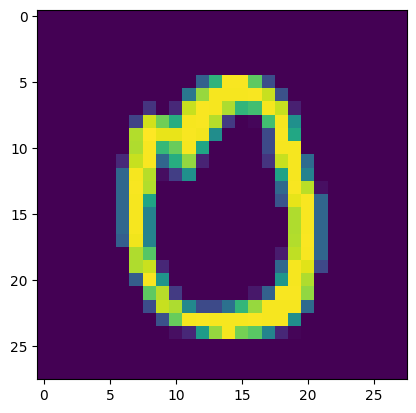

In [ ]:
#An image sample

g = plt.imshow(X_ha13train[0][:,:,0])

## 3. Model Building

In [ ]:
#CNN Architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 ->
                           #Flatten -> Dense -> Dropout -> Out
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ha13_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [ ]:
#Compiling Model

model.compile(optimizer = ha13_optimizer, loss='categorical_crossentropy',
             metrics=["accuracy"])

In [ ]:
#Setting Learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [ ]:
ha13_epochs=10
ha13_batch_size = 112

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_ha13train)

## 4. Model Fitting

In [ ]:
if(tf.test.is_built_with_cuda() == True):
    print("CUDA Available.")
else:
    print("CUDA not Available.")

CUDA Available.


In [ ]:
#Fitting the model
# Commenting it since no need to run it again

#history = model.fit(datagen.flow(X_ha13train, Y_ha13train, batch_size=ha13_batch_size),
                 #  epochs=ha13_epochs,
                  #  validation_data=(X_val, Y_val),
                # verbose=2,
                # steps_per_epoch=X_ha13train.shape[0] // ha13_batch_size,
                 #callbacks=[learning_rate_reduction])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
337/337 - 258s - 766ms/step - accuracy: 0.8691 - loss: 0.4077 - val_accuracy: 0.9710 - val_loss: 0.0983 - learning_rate: 1.0000e-03
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 7s - 20ms/step - accuracy: 0.9464 - loss: 0.1643 - val_accuracy: 0.9771 - val_loss: 0.0683 - learning_rate: 1.0000e-03
Epoch 3/10
337/337 - 306s - 907ms/step - accuracy: 0.9654 - loss: 0.1114 - val_accuracy: 0.9857 - val_loss: 0.0460 - learning_rate: 1.0000e-03
Epoch 4/10
337/337 - 11s - 32ms/step - accuracy: 0.9732 - loss: 0.0528 - val_accuracy: 0.9826 - val_loss: 0.0575 - learning_rate: 1.0000e-03
Epoch 5/10
337/337 - 244s - 724ms/step - accuracy: 0.9754 - loss: 0.0808 - val_accuracy: 0.9867 - val_loss: 0.0402 - learning_rate: 1.0000e-03
Epoch 6/10
337/337 - 11s - 32ms/step - accuracy: 0.9821 - loss: 0.0554 - val_accuracy: 0.9864 - val_loss: 0.0371 - learning_rate: 1.0000e-03
Epoch 7/10
337/337 - 250s - 742ms/step - accuracy: 0.9799 - loss: 0.0660 - val_accuracy: 0.9848 - val_loss: 0.0520 - learning_rate: 1.0000e-03
Epoch 8/10
337/337 - 7s - 20ms/step - accuracy: 0.9464 - loss: 0.2188 - val_accuracy: 0.9855 - val_loss: 0.0403 - learning_rate: 1.0000e-03
Epoch 9/10
337/337 -

In [ ]:
# Saving the model for further faster processing

model.save("CNNmodel.keras", include_optimizer = True)

In [ ]:
from tensorflow.keras.models import load_model

# Define a custom object to map 'softmax_v2' to 'softmax'
custom_objects = {'softmax_v2': tf.keras.activations.softmax}
cnn_model = load_model("CNNmodel.keras", custom_objects=custom_objects)

## 5. Analyzing the model

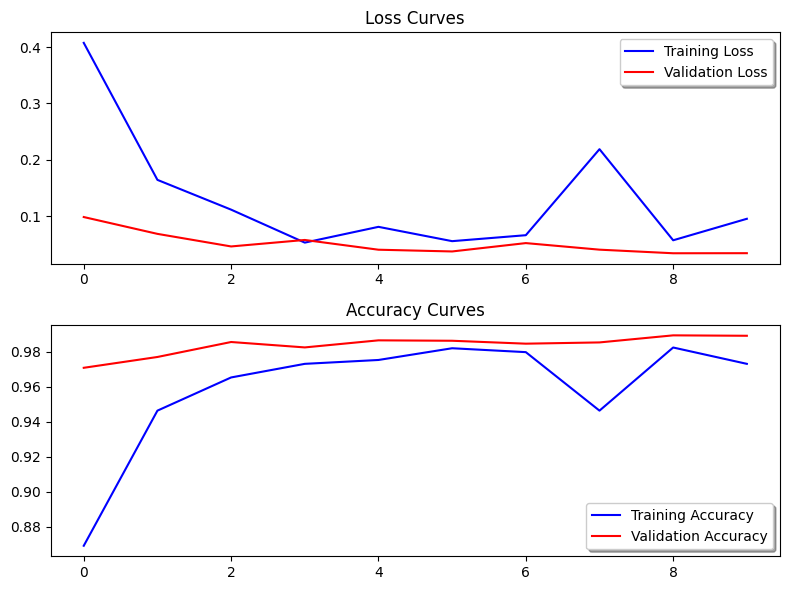

In [ ]:
# The loss and accuracy curves for training and validation

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Loss Curves')

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Accuracy Curves')

plt.tight_layout()
plt.show()


132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step


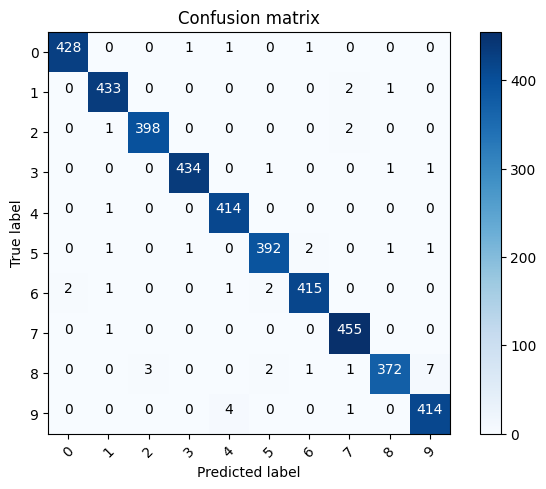

In [ ]:
# plotting confussion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

### Important Error

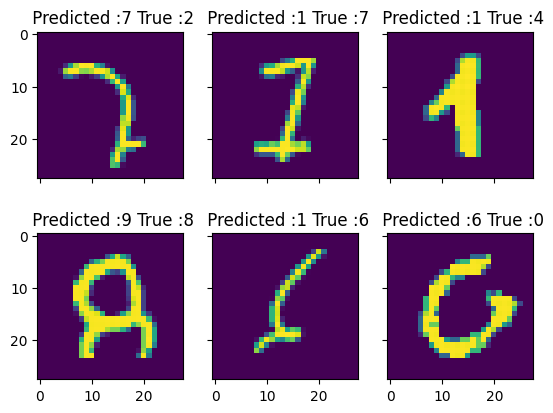

In [ ]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title(" Predicted :{} True :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 6. Predicting the test data

In [ ]:
# predict results
results = cnn_model.predict(ha13test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step


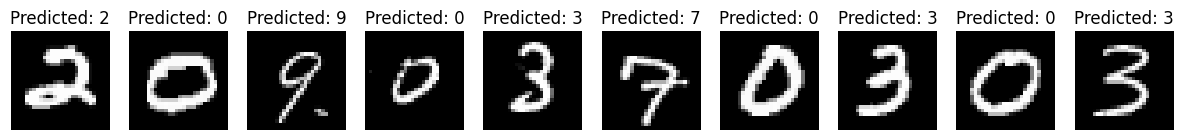

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'results' contains predicted labels and 'ha13test' contains test images
# Select a subset of images to display (e.g., the first 10)
num_images_to_display = 10
images = ha13test[:num_images_to_display]
predicted_labels = results[:num_images_to_display]

# Create a figure and axes for the images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Iterate through the images and display them with their predicted labels
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape and display the image
    ax.set_title(f"Predicted: {predicted_labels[i]}")  # Set the title with the predicted label
    ax.axis('off')  # Turn off the axes

plt.show()  # Show the figure

In [ ]:
import os
import numpy as np
from PIL import Image
import zipfile

# Create a ZIP file to store the images
output_zip = 'predicted_images.zip'

# Open a new ZIP file in write mode
with zipfile.ZipFile(output_zip, 'w') as zipf:
    # Iterate through the test images and save them with predicted labels
    for i, image in enumerate(ha13test):
        predicted_label = results[i]  # Get the predicted label for the current image
        image_data = (image.reshape(28, 28) * 255).astype(np.uint8)  # Reshape and scale to 0-255
        image = Image.fromarray(image_data, mode='L')  # Create a PIL Image object

        # Generate a temporary filename with .jpg extension
        image_filename = f'image_{i}_predicted_{predicted_label}.jpg'

        # Save the image as JPG
        image.save(image_filename, format='JPEG')

        # Add the file to the ZIP archive
        zipf.write(image_filename)

        # Remove the temporary file
        os.remove(image_filename)

print(f"Images saved to '{output_zip}' file.")

Images saved to 'predicted_images.zip' file.


In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)